In [23]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [24]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [26]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=key, 
    model_name='gpt-4o-mini',
    temperature=0.1
)

In [27]:
def chatbot(state: State):
    print('===== chatbot() 함수 시작 =====')
    
    print(f"[messages]: {state['messages']}")

    answer = llm.invoke(state['messages'])

    print(f"[chatbot answer]: {answer}")
    # print(f'[chatbot answer]: {answer.content}')
    
    print('===== chatbot() 함수  끝 =====')

    return {'messages': [answer]}

In [28]:
graph_builder = StateGraph(State)

In [29]:
graph_builder.add_node('chatbot', chatbot)      # 노드(함수) 이름을 인자로 받아서 chatbot 노드를 추가

In [30]:
graph_builder.add_edge(START, 'chatbot')        # 시작 노드에서 챗봇 노드(chatbot)로의 엣지 추가

In [31]:
graph_builder.add_edge('chatbot', END)          # chatbot 노드에서 END 노드로 엣지 추가

In [32]:
graph = graph_builder.compile()                 # 그래프 컴파일

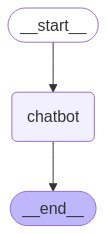

In [33]:
from IPython.display import Image, display      # 그래프 시각화

display(Image(graph.get_graph().draw_mermaid_png()))

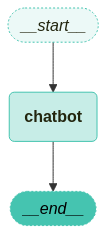

In [34]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [35]:
question = '대구 동성로 떡볶에에 대해서 알려줘'

In [36]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 10)
    print('[event]')
    print(event)
    print('===================' * 10)

===== chatbot() 함수 시작 =====
[messages]: [HumanMessage(content='대구 동성로 떡볶에에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='f2d652d8-eaae-4506-afd3-3289825c7253')]
[chatbot answer]: content='대구 동성로는 대구의 중심가로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳은 특히 떡볶이로 유명한 곳이 많아 많은 사람들이 찾는 명소입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스와 쫄깃한 떡이 어우러져 많은 사랑을 받고 있습니다.\n\n동성로의 떡볶이 가게들은 각기 다른 특색을 가지고 있으며, 다양한 토핑과 함께 제공되기도 합니다. 예를 들어, 어묵, 계란, 치즈, 그리고 다양한 채소를 추가하여 더욱 풍성한 맛을 즐길 수 있습니다. 또한, 길거리 음식으로도 인기가 많아 간편하게 먹을 수 있는 점이 매력적입니다.\n\n대구 동성로에서 떡볶이를 즐기고 싶다면, 여러 가게를 비교해 보며 자신만의 최애 떡볶이를 찾아보는 것도 좋은 경험이 될 것입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 224, 'prompt_tokens': 21, 'total_tokens': 245, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b8bc95a0ac', 'f

In [37]:
from langchain_core.messages import HumanMessage, AIMessage

humanMessage = HumanMessage(
    content='대구 동성로 떡볶이에 대해서 알려줘', 
    additional_kwargs={}, 
    response_metadata={}, 
    id='1'
)

state = State(messages=[humanMessage])

for event in graph.stream(state):
    print('===================' * 10)
    print('[event]')

    print(f"(1) [content]: \n {event['chatbot']['messages'][-1].content}")
    print(f"(2) [additional_kwargs]: \n {event['chatbot']['messages'][-1].additional_kwargs}")
    print(f"(3) [response_metadata]: \n {event['chatbot']['messages'][-1].response_metadata}")
    print(f"(4) id: {event['chatbot']['messages'][-1].id}")
    print('===================' * 10)

===== chatbot() 함수 시작 =====
[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='1')]
[chatbot answer]: content='대구 동성로는 대구의 대표적인 번화가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 특히 유명한 음식 중 하나가 떡볶이입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스에 쫄깃한 떡과 다양한 재료가 어우러져 많은 사람들에게 사랑받고 있습니다.\n\n동성로에는 여러 떡볶이 전문점이 있으며, 각 가게마다 특색 있는 소스와 재료를 사용하여 독특한 맛을 제공합니다. 일반적으로 떡볶이와 함께 튀김, 오뎅, 계란 등을 곁들여 먹는 경우가 많습니다. 특히, 대구의 떡볶이는 다른 지역과 비교했을 때 조금 더 매운 편이어서 매운 음식을 좋아하는 사람들에게 인기가 높습니다.\n\n또한, 동성로는 젊은 층과 관광객들이 많이 찾는 곳이기 때문에, 떡볶이를 먹으면서 다양한 거리 공연이나 쇼핑을 즐길 수 있는 매력적인 장소입니다. 대구를 방문한다면 동성로의 떡볶이를 꼭 한 번 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 275, 'prompt_tokens': 20, 'total_tokens': 295, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18

In [38]:
humanMessage = HumanMessage(
    content='대구 동성로 떡볶이에 대해서 알려줘', 
    additional_kwargs={}, 
    response_metadata={}, 
    id='2')

state = State(messages=[humanMessage])

for event in graph.stream(state):
    print('===================' * 10)
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'실행된 노드 이름: {k}')
        print(f"assistant 답변: ")
        print(f"{value['messages'][-1].content}")
        print()
    print('===== for 끝 =====')
    print('===================' * 10)

===== chatbot() 함수 시작 =====
[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='2')]
[chatbot answer]: content='대구 동성로는 대구의 대표적인 번화가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 특히 유명한 음식 중 하나가 떡볶이입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스와 쫄깃한 떡이 어우러져 많은 사람들에게 사랑받고 있습니다.\n\n대구 동성로의 떡볶이는 일반적으로 다음과 같은 특징이 있습니다:\n\n1. **매운맛**: 대구 지역의 떡볶이는 다른 지역에 비해 매운맛이 강한 편입니다. 고추장과 고춧가루를 사용하여 매콤한 맛을 강조합니다.\n\n2. **다양한 재료**: 떡볶이에는 어묵, 삶은 계란, 채소 등 다양한 재료가 함께 들어가며, 이로 인해 풍부한 맛을 느낄 수 있습니다.\n\n3. **길거리 음식**: 동성로는 길거리 음식으로 유명한 곳이기도 하여, 많은 떡볶이 가게들이 포장마차 형태로 운영되고 있습니다. 이곳에서 즉석에서 조리된 떡볶이를 즐길 수 있습니다.\n\n4. **인기 가게**: 동성로에는 유명한 떡볶이 가게들이 많아, 각 가게마다 특색 있는 소스와 조리법으로 차별화를 두고 있습니다. 일부 가게는 특별한 비법 소스를 사용하여 많은 단골 손님을 확보하고 있습니다.\n\n대구 동성로의 떡볶이는 그 맛과 분위기로 인해 많은 관광객과 지역 주민들에게 사랑받고 있으며, 대구를 방문할 때 꼭 맛봐야 할 음식 중 하나입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 390, 'prompt_tokens': 20, 'total_tokens': 410, 'completion_tokens_details': {'accepted_

In [39]:
question = '대구 동성로 떡볶이에 대해서 알려줘'

# state = State(messages=[('user', question)])

for event in graph.stream({'messages': [('user', question)]}):
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')        
        print(f"[assistant 답변]: \n{value['messages'][-1].content}")

    print('===== for  끝 =====')

===== chatbot() 함수 시작 =====
[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='dee79809-9a5a-4378-b7fe-92adc6ccb618')]
[chatbot answer]: content='대구 동성로는 대구의 대표적인 번화가 중 하나로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 특히 유명한 음식 중 하나가 떡볶이입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스와 쫄깃한 떡이 어우러져 많은 사람들에게 사랑받고 있습니다.\n\n대구의 떡볶이는 일반적으로 고추장 기반의 소스를 사용하며, 어묵, 양배추, 대파 등 다양한 재료가 함께 들어갑니다. 또한, 대구에서는 떡볶이에 치즈를 추가하거나, 튀김과 함께 제공하는 경우도 많아 더욱 풍성한 맛을 즐길 수 있습니다.\n\n동성로에는 떡볶이 전문점뿐만 아니라 다양한 분식집이 있어, 각기 다른 스타일의 떡볶이를 맛볼 수 있습니다. 특히, 야외에서 먹는 길거리 음식으로도 인기가 많아, 많은 사람들이 이곳에서 떡볶이를 즐기며 소중한 시간을 보내고 있습니다.\n\n대구를 방문한다면 동성로에서 떡볶이를 꼭 한 번 맛보는 것을 추천합니다!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 268, 'prompt_tokens': 20, 'total_tokens': 288, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'mo

In [45]:
from langchain.schema import HumanMessage, AIMessage
from langchain_core.messages import ToolMessage

question = '대구 동성로 떡볶이에 대해서 알려줘'

# state = State(messages=[('user', question)])

for event in graph.stream({'messages': [('user', question)]}):
    print()
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')        
        # print(f"메시지: {value['messages'][-1]}")

        if isinstance(value['messages'][-1], HumanMessage):
            print('==================== HumanMessage ========================')

            print('==================== END HumanMessage ====================')
            print() 
        elif isinstance(value['messages'][-1], AIMessage):
            print('==================== AIMessage ========================')
            # print(f"[해당 노드 값] : \n{value['messages'][-1]}")
            print(f"[해당 노드 값] : \n{value['messages'][-1].content}")
            print('==================== END AIMessage ====================')     
            print()  
        elif isinstance(value['messages'][-1], ToolMessage):
            print('==================== ToolMessage ========================')

            print('==================== END ToolMessage ====================')     
            print()
    print('===== for  끝 =====')

===== chatbot() 함수 시작 =====
[messages]: [HumanMessage(content='대구 동성로 떡볶이에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='33352d16-a20e-4608-8f43-ae91cf7ec8bb')]
[chatbot answer]: content='대구 동성로는 대구의 중심가로, 다양한 음식점과 상점들이 밀집해 있는 지역입니다. 이곳에서 특히 유명한 음식 중 하나가 떡볶이입니다. 동성로의 떡볶이는 매콤하고 달콤한 소스에 쫄깃한 떡과 다양한 재료가 어우러져 많은 사람들에게 사랑받고 있습니다.\n\n동성로에는 여러 떡볶이 전문점이 있으며, 각 가게마다 특색 있는 레시피와 재료를 사용합니다. 예를 들어, 일부 가게는 해물이나 치킨, 야채 등을 추가하여 다양한 맛을 즐길 수 있도록 하고 있습니다. 또한, 길거리 음식으로도 인기가 많아, 많은 사람들이 간편하게 먹을 수 있는 스낵으로 즐깁니다.\n\n대구 동성로의 떡볶이는 그 지역의 문화와 분위기를 느낄 수 있는 대표적인 음식 중 하나로, 대구를 방문하는 관광객들에게도 꼭 추천되는 메뉴입니다. 떡볶이 외에도 다양한 길거리 음식과 함께 즐길 수 있어, 많은 사람들이 찾는 명소입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 252, 'prompt_tokens': 20, 'total_tokens': 272, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name':